In [6]:
# Import Library

In [7]:
import pandas as pd

In [8]:
# Open the Data set

In [9]:
dataset=pd.read_csv("insurance_pre.csv")

In [10]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [11]:
# Remove the categorical data(i.e str-state)

In [12]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [13]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [14]:
# splite the input & output columns

In [15]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [16]:
independant=dataset[['age','bmi','children','sex_male','smoker_yes']]

In [17]:
independant

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [18]:
dependant= dataset[['charges']]

In [19]:
dependant

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [20]:
#split the Train & Test dataset

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(independant,dependant,test_size=0.30,random_state=0)

In [22]:
X_train

,age,bmi,children,sex_male,smoker_yes
1163,18,28.215,0,0,0
196,39,32.800,0,0,0
438,52,46.750,5,0,0
183,44,26.410,0,0,0
1298,33,27.455,2,1,0
...,...,...,...,...,...
763,27,26.030,0,1,0
835,42,35.970,2,1,0
1216,40,25.080,0,1,0
559,19,35.530,0,1,0


In [23]:
# Train data-Model creation

In [59]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson',splitter='random')
regressor= regressor.fit(X_train,Y_train)

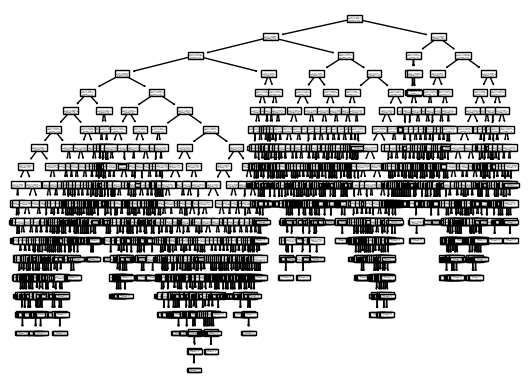

In [66]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [67]:
# Evaluation Method Presidcting the Test set result

In [68]:
Y_pred = regressor.predict(X_test)

In [69]:
from sklearn.metrics import r2_score
r_score =r2_score(Y_test,Y_pred)

In [70]:
r_score

0.7182482120461835